# 비지도 학습

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt 
data=[]
for i in range(50):
    data.append([random.randint(40,70),random.randint(140,180)])#여자그룹
    data.append([random.randint(60,90),random.randint(170,200)])#남자그룹
    

In [32]:
#남성
#data[0:100:2]
for female in data[0:100:2]:
    print(female,end=' ')
print()
print('-'*134)
#여성
#data[1:100:2]
for female in data[1:100:2]:
    print(female,end=' ')

[51, 176] [58, 168] [45, 174] [64, 162] [48, 179] [69, 177] [61, 176] [45, 153] [58, 153] [50, 178] [50, 174] [65, 160] [52, 167] [51, 146] [56, 143] [66, 158] [50, 143] [51, 146] [59, 161] [51, 146] [41, 150] [66, 166] [40, 165] [51, 152] [63, 178] [40, 147] [44, 155] [51, 168] [64, 164] [60, 154] [45, 165] [59, 171] [44, 150] [61, 154] [55, 151] [60, 158] [49, 175] [58, 159] [43, 169] [57, 143] [69, 147] [43, 171] [61, 157] [40, 146] [45, 158] [52, 162] [53, 168] [43, 147] [41, 170] [48, 159] 
--------------------------------------------------------------------------------------------------------------------------------------
[62, 200] [84, 200] [61, 187] [71, 184] [66, 173] [73, 179] [73, 176] [66, 173] [83, 194] [85, 191] [85, 179] [62, 177] [86, 183] [86, 188] [78, 173] [77, 194] [81, 181] [61, 193] [81, 188] [65, 174] [71, 179] [80, 180] [66, 189] [90, 182] [65, 199] [70, 183] [80, 171] [68, 183] [62, 181] [88, 180] [82, 194] [90, 172] [81, 198] [73, 176] [63, 195] [75, 183] [77,

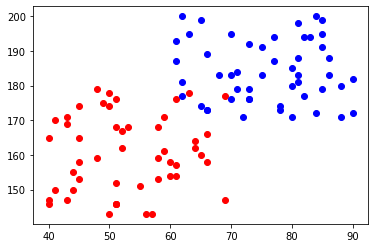

In [39]:
# 여자 몸무게 
[women_weight[0] for women_weight in data[0:100:2]]
# 여자 키
[women_tall[1] for women_tall in data[0:100:2]]
# 남자 몸무게 
[man_weight[0] for man_weight in data[1:100:2]]
# 남자 키
[man_tall[1] for man_tall in data[1:100:2]]
plt.plot([women_weight[0] for women_weight in data[0:100:2]],[women_tall[1] for women_tall in data[0:100:2]],'o',color='r')
plt.plot([man_weight[0] for man_weight in data[1:100:2]],[man_tall[1] for man_tall in data[1:100:2]],'o',color='b')

In [61]:
#초기 랜덤 지점 2개 #두그룹으로 나누기 위해서 두점
random_points=[[random.randint(40,90),random.randint(140,200)],[random.randint(40,90),random.randint(140,200)]]
print('초기 랜덤 기준점:',random_points)

초기 랜덤 기준점: [[76, 190], [70, 151]]


In [62]:
#기준점1
print(random_points[0][0],random_points[0][1],end='/')
#기준점2
print(random_points[1][0],random_points[1][1])

76 190/70 151


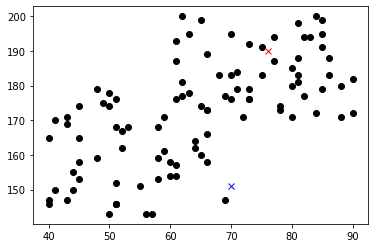

In [63]:
for x in data:
    plt.plot(x[0],x[1],'o',color='k')
plt.plot(random_points[0][0],random_points[0][1],'x',color='r')#기준점
plt.plot(random_points[1][0],random_points[1][1],'x',color='b')#기준점

In [59]:
# 두 영역으로 나눌 빈 리스트 생성
group1=[]
group2=[]

In [58]:
# 영역을 나누기 위해 두 점 사이의 거리를 구하는 함수[0,0],[3,4]
def dist(a,b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)


In [60]:
a=[0,0]; b=[3,4]
dist(a,b)

5.0

In [64]:
for d in data:
    if dist(random_points[0],d) < dist(random_points[1],d):# 빨간 x점과 더 가까운 그룹
        group1.append(d)# 빨간 x점과 더 가까운 그룹
    else:
        group2.append(d)# 파란 x점과 더 가까운 그룹


In [66]:
len(group1),len(group2)

(57, 43)

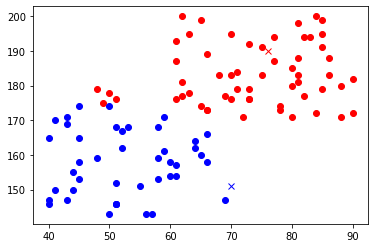

In [68]:
# 새로운 영역과 랜덤점 그래프 
for d in group1:
    plt.plot(d[0],d[1],'o',color='r')
for d in group2:
    plt.plot(d[0],d[1],'o',color='b')
plt.plot(random_points[0][0],random_points[0][1],'x',color='r')#기준점1
plt.plot(random_points[1][0],random_points[1][1],'x',color='b')#기준점2

In [74]:
#기준점 이동
sumX=0; sumY=0
for g in group1:
    sumX+=g[0]#x축값들 누적
    sumY+=g[1]#y축값들 누적
#새로운 기준점1
new_points=[]
new_points.append([sumX/len(group1),sumY/len(group1)])
sumX=0; sumY=0
for g in group2:
    sumX+=g[0]#x축값들 누적
    sumY+=g[1]#y축값들 누적
new_points.append([sumX/len(group2),sumY/len(group2)])
print(random_points)
new_points

[[76, 190], [70, 151]]


[[73.35087719298245, 183.140350877193],
 [52.44186046511628, 157.67441860465115]]

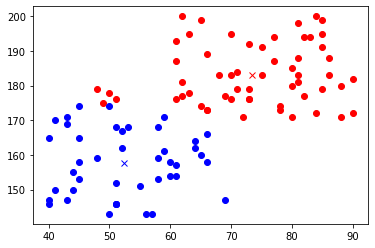

In [75]:
# 새로운 영역과 랜덤점 그래프 
for d in group1:
    plt.plot(d[0],d[1],'o',color='r')
for d in group2:
    plt.plot(d[0],d[1],'o',color='b')
plt.plot(new_points[0][0],new_points[0][1],'x',color='r')#기준점1
plt.plot(new_points[1][0],new_points[1][1],'x',color='b')#기준점2

In [76]:
group1=[]
group2=[]
for d in data:
    if dist(new_points[0],d) < dist(new_points[1],d):# 빨간 x점과 더 가까운 그룹
        group1.append(d)# 빨간 x점과 더 가까운 그룹
    else:
        group2.append(d)# 파란 x점과 더 가까운 그룹

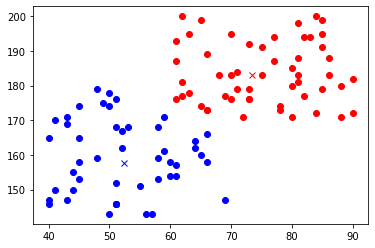

In [77]:
# 새로운 영역과 랜덤점 그래프 
for d in group1:
    plt.plot(d[0],d[1],'o',color='r')
for d in group2:
    plt.plot(d[0],d[1],'o',color='b')
plt.plot(new_points[0][0],new_points[0][1],'x',color='r')#기준점1
plt.plot(new_points[1][0],new_points[1][1],'x',color='b')#기준점2

# 전체코드

In [93]:
import random
import numpy as np
import matplotlib.pyplot as plt 

# 영역을 나누기 위해 두 점 사이의 거리를 구하는 함수[0,0],[3,4]
def dist(a,b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

data=[]
for i in range(50):
    data.append([random.randint(40,70),random.randint(140,180)])#여자그룹
    data.append([random.randint(60,90),random.randint(170,200)])#남자그룹
new_points=[[random.randint(40,70),random.randint(140,180)],[random.randint(60,90),random.randint(170,200)]]#기준점!
print('초기기준점:',new_points)
for i in range(1,11):
    group1=[]
    group2=[]
    for d in data:
        if dist(new_points[0],d)<dist(new_points[1],d):
            group1.append(d)
        else:
            group2.append(d)
    # group1 과 group2의 중간지점을 새로운 기준점!
    sumX=0; sumY=0
    for g in group1:
        sumX +=g[0]
        sumY +=g[1]
    new_points=[]
    new_points.append([sumX/len(group1),sumY/len(group1)])
    sumX=0; sumY=0
    for g in group2:
        sumX +=g[0]
        sumY +=g[1]
    new_points.append([sumX/len(group2),sumY/len(group2)])
    print(i,'번쨰 기준점:',new_points)
    

초기기준점: [[43, 179], [68, 173]]
1 번쨰 기준점: [[45.21052631578947, 163.1578947368421], [68.81481481481481, 173.87654320987653]]
2 번쨰 기준점: [[52.1, 156.95], [72.48333333333333, 181.76666666666668]]
3 번쨰 기준점: [[53.04651162790697, 156.86046511627907], [72.84210526315789, 183.140350877193]]
4 번쨰 기준점: [[53.22727272727273, 157.1818181818182], [73.05357142857143, 183.35714285714286]]
5 번쨰 기준점: [[53.44444444444444, 157.46666666666667], [73.23636363636363, 183.6]]
6 번쨰 기준점: [[53.69565217391305, 157.7173913043478], [73.38888888888889, 183.87037037037038]]
7 번쨰 기준점: [[53.69565217391305, 157.7173913043478], [73.38888888888889, 183.87037037037038]]
8 번쨰 기준점: [[53.69565217391305, 157.7173913043478], [73.38888888888889, 183.87037037037038]]
9 번쨰 기준점: [[53.69565217391305, 157.7173913043478], [73.38888888888889, 183.87037037037038]]
10 번쨰 기준점: [[53.69565217391305, 157.7173913043478], [73.38888888888889, 183.87037037037038]]


[65, 169]

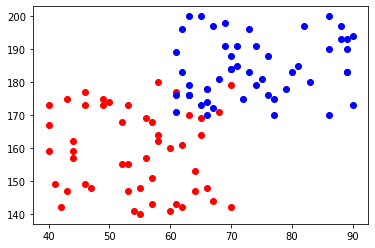

In [99]:
# 여자 몸무게
[d[0] for d in data[0:100:2]]
# 여자 키
[d[1] for d in data[0:100:2]]
# 남자 몸무게
[d[0] for d in data[1:100:2]]
# 남자 키
[d[1] for d in data[1:100:2]]
plt.plot([d[0] for d in data[0:100:2]],[d[1] for d in data[0:100:2]],'o',color='r')
plt.plot([d[0] for d in data[1:100:2]],[d[1] for d in data[1:100:2]],'o',color='b')

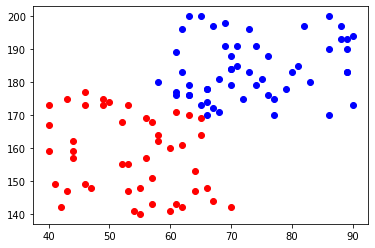

In [100]:
for g in group1:
    plt.plot(g[0],g[1],'o',color='r')
for g in group2:
    plt.plot(g[0],g[1],'o',color='b')
    